In [2]:
import numpy as np
import progressbar
import time
import re
from PIL import Image
import random

In [3]:
# Folder names and number of images for all 18 generated videos with truth segmentation labels
dataset_idxs = {'P000': 2315, 'P001': 1991, 'P002': 1064, 'P003': 586, 'P004': 1276,
                'P005': 857, 'P006': 577, 'P007': 532, 'P008': 1133, 'P009': 300,
                'P010': 1547, 'P011': 983, 'P012': 1215, 'P013': 496, 'P014': 553,
                'P015': 614, 'P016': 1028, 'P017': 879}
# Segmentation class colors come from AirSim's specified colors, documented in airsim_obj_seg_rgb.txt
seg_colors = list()
with open('airsim_obj_seg_rgb.txt','r') as colorfile:
    for i, line in enumerate(colorfile):
        if i < 2:
            continue
        r = int(line.split('[')[1].split(',')[0])
        g = int(line.split(',')[1])
        b = int(line.split(',')[-1].replace(']',''))
        seg_colors.append((r,g,b))

In [85]:
# To consolidate all AirSim object classes into a smaller subset, a taxonomy of the smaller subset classes across
# all videos must be made. Then, the individual classes can be examined in example images to determine which subset
# class they should belong to.
unique_obj_ids = dict()
for dataset in dataset_idxs.keys():
    print(dataset)
    time.sleep(0.5)
    for i in progressbar.progressbar(range(dataset_idxs[dataset]+1)):
        seg_data = np.load(f'{dataset}/{i:06d}_left_seg.npy')
        obj_ids = np.unique(seg_data).tolist()
        for obj_id in obj_ids:
            if not obj_id in unique_obj_ids:
                unique_obj_ids[obj_id] = [(dataset, i)]
            else:
                unique_obj_ids[obj_id].append((dataset, i))

P000


 89% (2082 of 2316) |#################   | Elapsed Time: 0:00:23 ETA:   0:00:05

KeyboardInterrupt: 

In [154]:
# All object classes--over 200 of them
print(len(sorted(unique_obj_ids.keys())))
todo = [0,13,28,34,46,50,53,56,59,64,69,71,85,95,96,99,101,104,105,110,112,113,118,119,120,121,122,124,125,129,132,136,140,141,142,144,145,146,147,148,151,152,153,156,163,164,166,168,170,171,172,173,174,178,180,181,182,183,185,186,189,190,192,194,196,198,199,200,201,202,203,205,206,208,209,210,217,218,220,221,222,223,224,226,227,228,229,231,232,233,236,237,239,241,242,243,245,247,248,250,251,252,253,254,255]
len(todo)

105


105

In [29]:
# Functions for visualizing dataset images and corresponding class segmentations.
# Provides the ability to just visualize a specific class present in the image.

def vis_seg(dataset, idx, obj_id=None):
    segdata = np.load(f'{dataset}/{idx:06d}_left_seg.npy')
    segarray = np.empty((480, 640, 3))
    for i in range(480):
        for j in range(640):
            o_i = int(segdata[i,j])
            if not obj_id is None:
                if o_i == obj_id:
                    segarray[i,j,:] = np.array([255,1,1])
                else:
                    segarray[i,j,:] = np.array([0,0,0])
            else:
                segarray[i,j,:] = np.array(seg_colors[o_i])
    return Image.fromarray(segarray.astype(np.uint8))

def viz_seg(dataset, idx, obj_id=None):
    segdata = np.load(f'{dataset}/{idx:06d}_seg.npy')
    segarray = np.empty((480, 640, 3))
    for i in range(480):
        for j in range(640):
            o_i = int(segdata[i,j])
            if not obj_id is None:
                if o_i == obj_id:
                    segarray[i,j,:] = np.array([255,1,1])
                else:
                    segarray[i,j,:] = np.array([0,0,0])
            else:
                segarray[i,j,:] = np.array(seg_colors[o_i])
    return Image.fromarray(segarray.astype(np.uint8))

def vis_sbs(dataset, idx, obj_id=None, overlay=False, resize=True):
    rgb = np.array(Image.open(f'{dataset}/{idx:06d}_left.png'))
    segarray = np.array(vis_seg(dataset, idx, obj_id))
    if overlay:
        rgb = np.where(segarray>0,segarray,rgb)
    comp = np.hstack((rgb, segarray))
    if resize:
        com = Image.fromarray(comp.astype(np.uint8)).resize(size=(640,240))
    else:
        com = Image.fromarray(comp.astype(np.uint8))
    return com

def viz_sbs(dataset, idx, obj_id=None, overlay=False, resize=True):
    rgb = np.array(Image.open(f'{dataset}/{idx:06d}_left.png'))
    segarray = np.array(viz_seg(dataset, idx, obj_id))
    if overlay:
        rgb = np.where(segarray>0,segarray,rgb)
    comp = np.hstack((rgb, segarray))
    if resize:
        com = Image.fromarray(comp.astype(np.uint8)).resize(size=(640,240))
    else:
        com = Image.fromarray(comp.astype(np.uint8))
    return com

In [197]:
com = vis_sbs('P000',1)
com146 = vis_sbs('P000',1,146)

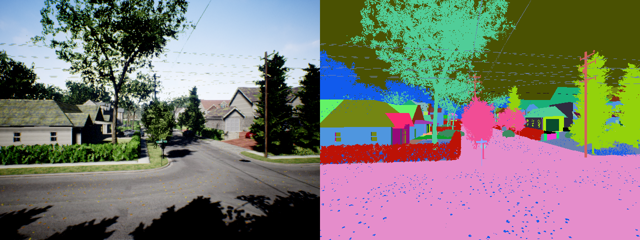

In [198]:
com

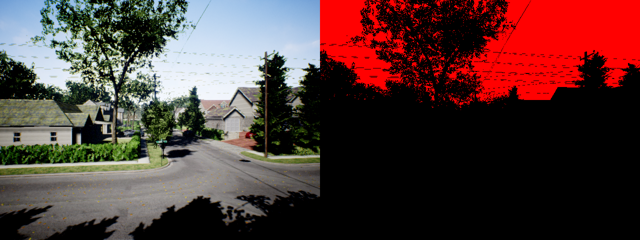

In [199]:
com146

In [153]:
# Identify the images that cover the largest amount of each object class. An examination of the resulting
# images will make it easier to identify the subset classes that they each belong to.
for obj_id in unique_obj_ids.keys():
    print(obj_id)
    time.sleep(0.5)
    dataset, i, numpix = None, None, 0
    for ditup in progressbar.progressbar(unique_obj_ids[obj_id]):
        segarray = np.array(vis_seg(ditup[0],ditup[1],obj_id).resize(size=(120,160)))
        npix = np.sum(np.where(segarray>0,1,0))
        if npix > numpix:
            numpix = npix
            dataset = ditup[0]
            i = ditup[1]
    com = vis_sbs(dataset, i, obj_id)
    com.save(f'objs/{obj_id}.png')

0


100% (3966 of 3966) |####################| Elapsed Time: 0:32:28 Time:  0:32:28


64


100% (8920 of 8920) |####################| Elapsed Time: 1:12:16 Time:  1:12:16


85


100% (10678 of 10678) |##################| Elapsed Time: 1:27:23 Time:  1:27:23


95


100% (10317 of 10317) |##################| Elapsed Time: 1:23:36 Time:  1:23:36


96


100% (7063 of 7063) |####################| Elapsed Time: 0:56:51 Time:  0:56:51


99


100% (10870 of 10870) |##################| Elapsed Time: 1:27:17 Time:  1:27:17


101


 44% (5083 of 11465) |########           | Elapsed Time: 0:41:28 ETA:   0:53:39

KeyboardInterrupt: 

In [101]:
# Alternative, quicker process for selecting images to examine for each class
for obj_id in todo:
    print(obj_id)
    time.sleep(0.5)
    for j in range(10):
        dataset, i = random.choice(unique_obj_ids[obj_id])
        com = vis_sbs(dataset, i, obj_id, True, False)
        com.save(f'tmp/{obj_id}_{j}.png')

171


In [102]:
# Class replacement rules, derived from manual inspection of the class taxonomy created from the code above.
nh_classes = {
    0: [251], # road
    11: [220], # vehicle
    16: [224,247,254], # vegetation
    48: [171,152,196,253,85], # tree
    49: [163,178,198,221], # traffic fixtures
    7: [146], # sky
    205: [105], # fence
    8: [0,104,110,168,182,227,205,95,242,248,28,132], # stone
    202: [101,112,174,113,226,243,69,96,233,56,50,46,59,71,250,34,237,53,245,236,232,241,228,217,229,223,222,203,209,199,206,202,208,201,181,186,194,189,190,192,185,172,180,153,166,170,156,164,147,148,118,119,145,120,121,125,129,13,144,136,140,141,142], # house
    10: [122,200,255], # pool
    1: [124,151,173,183,210,218,231,239,252,64,99], # roof
}

In [74]:
seg_colors

[(0, 0, 0),
 (153, 108, 6),
 (112, 105, 191),
 (89, 121, 72),
 (190, 225, 64),
 (206, 190, 59),
 (81, 13, 36),
 (115, 176, 195),
 (161, 171, 27),
 (135, 169, 180),
 (29, 26, 199),
 (102, 16, 239),
 (242, 107, 146),
 (156, 198, 23),
 (49, 89, 160),
 (68, 218, 116),
 (11, 236, 9),
 (196, 30, 8),
 (121, 67, 28),
 (0, 53, 65),
 (146, 52, 70),
 (226, 149, 143),
 (151, 126, 171),
 (194, 39, 7),
 (205, 120, 161),
 (212, 51, 60),
 (211, 80, 208),
 (189, 135, 188),
 (54, 72, 205),
 (103, 252, 157),
 (124, 21, 123),
 (19, 132, 69),
 (195, 237, 132),
 (94, 253, 175),
 (182, 251, 87),
 (90, 162, 242),
 (199, 29, 1),
 (254, 12, 229),
 (35, 196, 244),
 (220, 163, 49),
 (86, 254, 214),
 (152, 3, 129),
 (92, 31, 106),
 (207, 229, 90),
 (125, 75, 48),
 (98, 55, 74),
 (126, 129, 238),
 (222, 153, 109),
 (85, 152, 34),
 (173, 69, 31),
 (37, 128, 125),
 (58, 19, 33),
 (134, 57, 119),
 (218, 124, 115),
 (120, 0, 200),
 (225, 131, 92),
 (246, 90, 16),
 (51, 155, 241),
 (202, 97, 155),
 (184, 145, 182),
 (96

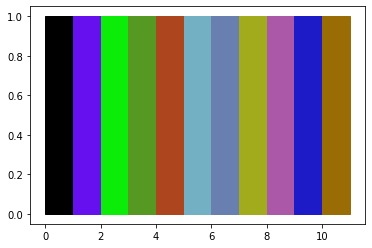

In [103]:
# Visualize segmentation colors for the created subset classes
import matplotlib.pyplot as plt
base_x = np.array([0,0,1,1])
base_y = np.array([0,1,1,0])
for i, key in enumerate(nh_classes.keys()):
    _rgb255 = seg_colors[key]
    _rgb1 = (_rgb255[0]/255.0, _rgb255[1]/255.0, _rgb255[2]/255.0)
    plt.fill(base_x+i,base_y,color=_rgb1)

In [104]:
# Carry out the object class replacements from the replacement rules in nh_classes
new_obj_ids = dict()
for dataset in dataset_idxs.keys():
    print(dataset)
    time.sleep(0.5)
    for i in progressbar.progressbar(range(dataset_idxs[dataset]+1)):
        seg_data = np.load(f'{dataset}/{i:06d}_left_seg.npy')
        new_seg_data = np.array(seg_data, copy=True)
        for key, obj_ids in nh_classes.items():
            new_seg_data = np.where(np.isin(seg_data, obj_ids), key, new_seg_data)
        np.save(f'{dataset}/{i:06d}_seg.npy',new_seg_data)
        obj_ids = np.unique(new_seg_data).tolist()
        for obj_id in obj_ids:
            if not obj_id in new_obj_ids:
                new_obj_ids[obj_id] = [(dataset, i)]
            else:
                new_obj_ids[obj_id].append((dataset, i))

P000


100% (2316 of 2316) |####################| Elapsed Time: 0:00:59 Time:  0:00:59


P001


100% (1992 of 1992) |####################| Elapsed Time: 0:01:16 Time:  0:01:16


P002


100% (1065 of 1065) |####################| Elapsed Time: 0:00:38 Time:  0:00:38


P003


100% (587 of 587) |######################| Elapsed Time: 0:00:19 Time:  0:00:19


P004


100% (1277 of 1277) |####################| Elapsed Time: 0:00:47 Time:  0:00:47


P005


100% (858 of 858) |######################| Elapsed Time: 0:00:30 Time:  0:00:30


P006


100% (578 of 578) |######################| Elapsed Time: 0:00:22 Time:  0:00:22


P007


100% (533 of 533) |######################| Elapsed Time: 0:00:19 Time:  0:00:19


P008


100% (1134 of 1134) |####################| Elapsed Time: 0:00:42 Time:  0:00:42


P009


100% (301 of 301) |######################| Elapsed Time: 0:00:10 Time:  0:00:10


P010


100% (1548 of 1548) |####################| Elapsed Time: 0:00:58 Time:  0:00:58


P011


100% (984 of 984) |######################| Elapsed Time: 0:00:35 Time:  0:00:35


P012


100% (1216 of 1216) |####################| Elapsed Time: 0:00:43 Time:  0:00:43


P013


100% (497 of 497) |######################| Elapsed Time: 0:00:17 Time:  0:00:17


P014


100% (554 of 554) |######################| Elapsed Time: 0:00:20 Time:  0:00:20


P015


100% (615 of 615) |######################| Elapsed Time: 0:00:22 Time:  0:00:22


P016


100% (1029 of 1029) |####################| Elapsed Time: 0:00:37 Time:  0:00:37


P017


100% (880 of 880) |######################| Elapsed Time: 0:00:35 Time:  0:00:35


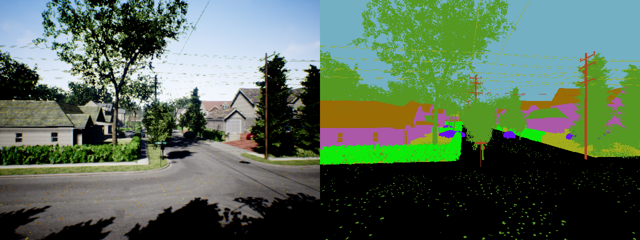

In [99]:
viz_sbs('P000',0)

In [95]:
for i in progressbar.progressbar(range(200)):
    img = viz_sbs('P000',i)
    img.save('tmp/%d.png' % i)

100% (200 of 200) |######################| Elapsed Time: 0:01:42 Time:  0:01:42


In [105]:
import shutil
import ffmpeg

In [119]:
# Create a video for each of the 18 video streams...takes a long time!
for dataset in dataset_idxs.keys():
    print(dataset)
    time.sleep(0.5)
    for i in progressbar.progressbar(range(dataset_idxs[dataset]+1)):
        viz_sbs(dataset, i).save(f'tmp/{dataset}_{i}.png')
    ffmpeg.input(f'tmp/{dataset}_%d.png').output(f'{dataset}.mp4', **{'c:v':'libx264','vf':'fps=25'}).run()

P000


100% (2316 of 2316) |####################| Elapsed Time: 0:23:03 Time:  0:23:03


P001


100% (1992 of 1992) |####################| Elapsed Time: 0:19:34 Time:  0:19:34


P002


100% (1065 of 1065) |####################| Elapsed Time: 0:10:44 Time:  0:10:44


P003


100% (587 of 587) |######################| Elapsed Time: 0:05:56 Time:  0:05:56


P004


100% (1277 of 1277) |####################| Elapsed Time: 0:13:01 Time:  0:13:01


P005


100% (858 of 858) |######################| Elapsed Time: 0:08:43 Time:  0:08:43


P006


100% (578 of 578) |######################| Elapsed Time: 0:05:53 Time:  0:05:53


P007


100% (533 of 533) |######################| Elapsed Time: 0:05:22 Time:  0:05:22


P008


100% (1134 of 1134) |####################| Elapsed Time: 0:11:31 Time:  0:11:31


P009


100% (301 of 301) |######################| Elapsed Time: 0:03:05 Time:  0:03:05


P010


100% (1548 of 1548) |####################| Elapsed Time: 0:15:52 Time:  0:15:52


P011


100% (984 of 984) |######################| Elapsed Time: 0:09:58 Time:  0:09:58


P012


100% (1216 of 1216) |####################| Elapsed Time: 0:12:22 Time:  0:12:22


P013


100% (497 of 497) |######################| Elapsed Time: 0:05:09 Time:  0:05:09


P014


100% (554 of 554) |######################| Elapsed Time: 0:05:41 Time:  0:05:41


P015


100% (615 of 615) |######################| Elapsed Time: 0:06:13 Time:  0:06:13


P016


100% (1029 of 1029) |####################| Elapsed Time: 0:10:26 Time:  0:10:26


P017


100% (880 of 880) |######################| Elapsed Time: 0:09:01 Time:  0:09:01
